#Essential Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-1-61c05ef47358>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
import warnings
warnings.filterwarnings("ignore")

#Data Loading

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Bank Customer Churn/Churn_Modelling.csv.xls")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data Preprocessing

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#dropping unessential columns
df = df.drop(columns=['RowNumber','CustomerId','Surname'])
df.shape

(10000, 11)

####Label Encoding for Gender and Geography

In [7]:
le = preprocessing.LabelEncoder()
df.Geography = le.fit_transform(df.Geography)
df.Gender = le.fit_transform(df.Gender)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.Gender.unique()

array([0, 1])

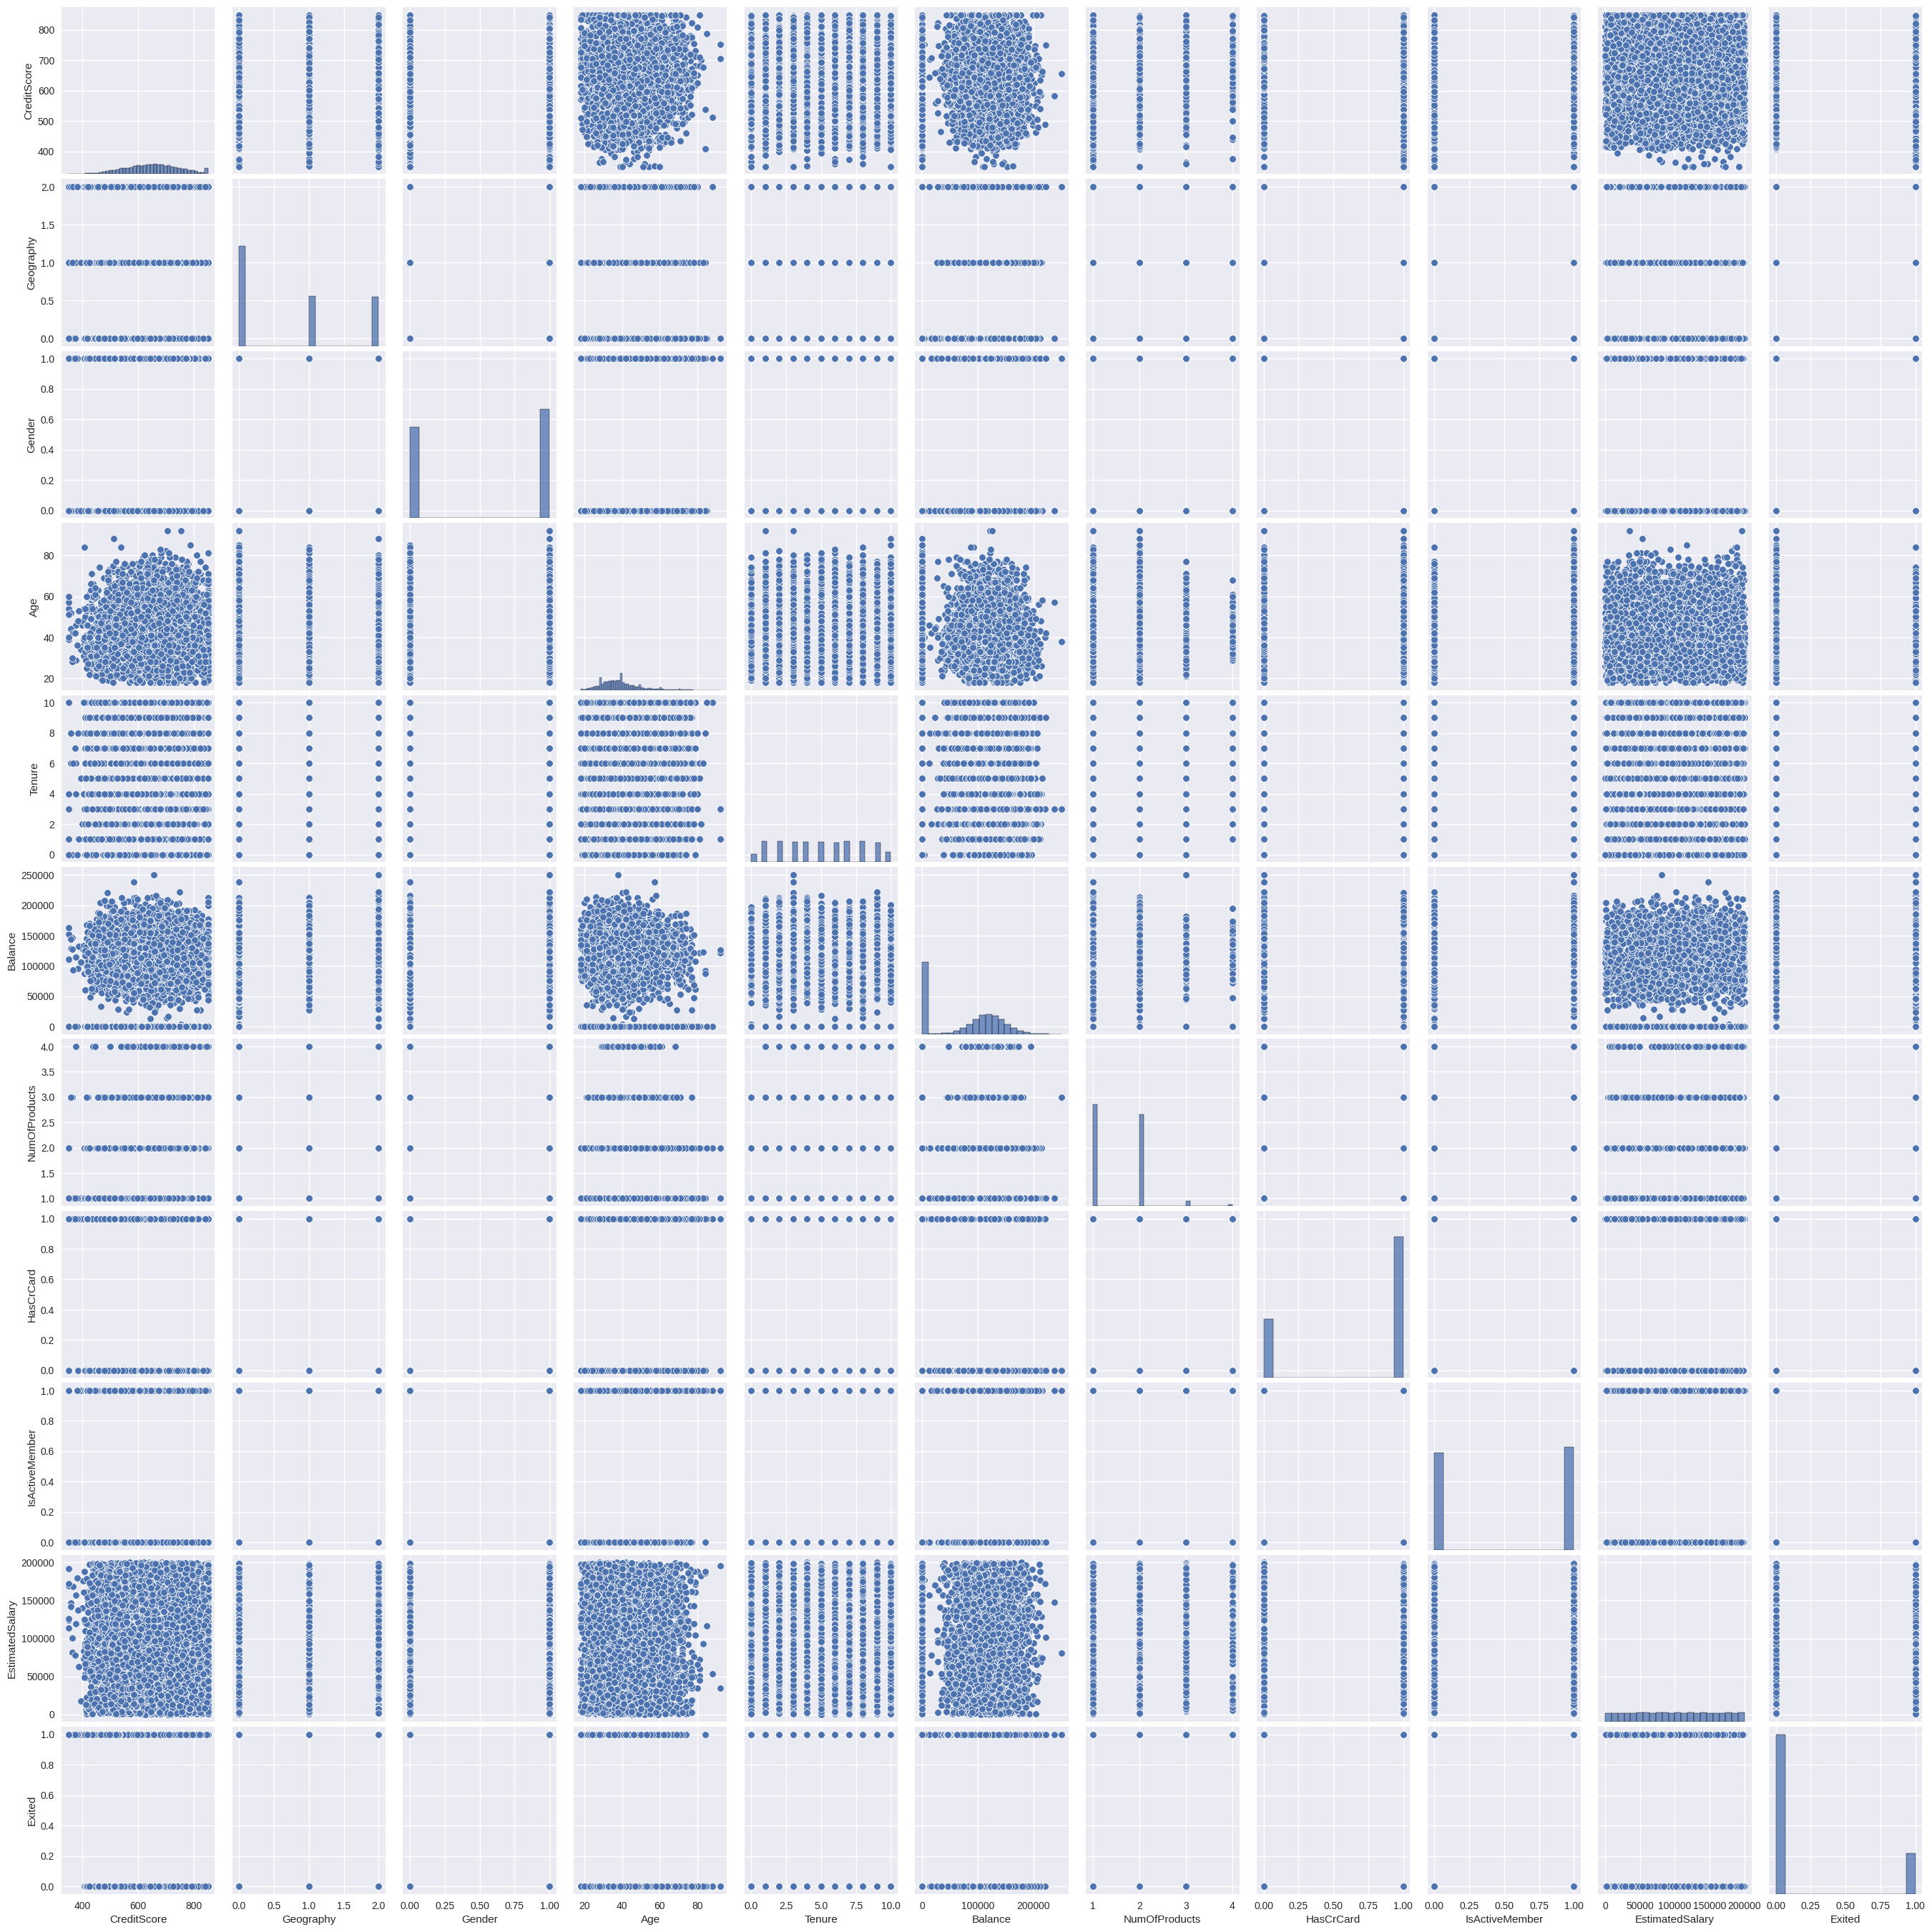

In [9]:
sns.pairplot(df)
plt.show()

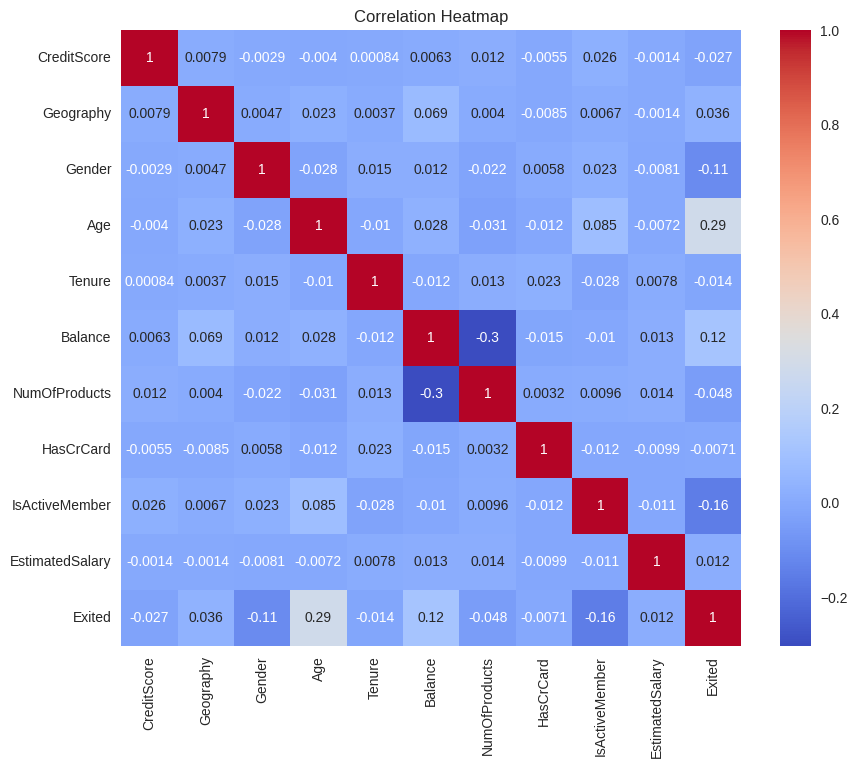

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'counts')

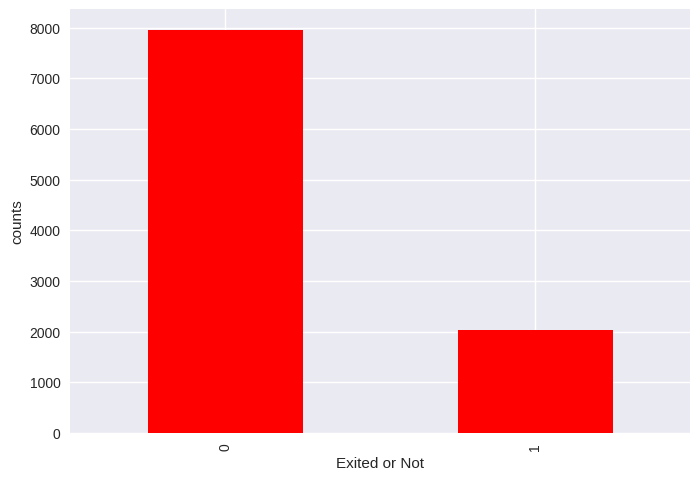

In [11]:
df["Exited"].value_counts().plot(kind = "bar", color = 'r')
plt.xlabel("Exited or Not")
plt.ylabel("counts")

In [12]:
X = df.drop(columns = ["Exited"])
y = df["Exited"]
print("Feature set shape = ", X.shape, "Target Label shape = ", y.shape)

Feature set shape =  (10000, 10) Target Label shape =  (10000,)


### Data Splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)
print("X_train size = ", X_train.shape, "y_train size = ", y_train.shape)
print("X_test size = ", X_test.shape, "y_test size = ", y_test.shape)

X_train size =  (8000, 10) y_train size =  (8000,)
X_test size =  (2000, 10) y_test size =  (2000,)


In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)
u = X_train.mean()
std = X_train.std()
X_train = (X_train - u) / std
X_test = (X_test - u) / std

### Data Standardization

#Model Training using Logistic Regression

In [15]:
lrm = LogisticRegression()
lrm.fit(X_train, y_train)

LogisticRegression()

### Evaluation of model

In [16]:
y_pred_lrm = lrm.predict(X_test)

In [17]:
accuracy_log = accuracy_score(y_test, y_pred_lrm)
print("The accuraccy got using logistic regression model is {:.2f}%".format(accuracy_log*100))

The accuraccy got using logistic regression model is 81.15%


In [18]:
print(classification_report(y_test, y_pred_lrm))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1623
           1       0.00      0.00      0.00       377

    accuracy                           0.81      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.66      0.81      0.73      2000



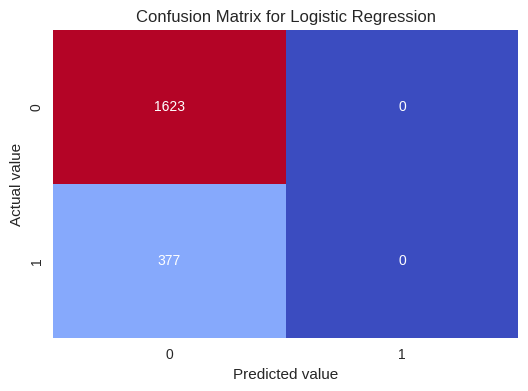

In [19]:
conf_matrix=confusion_matrix(y_test, y_pred_lrm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="coolwarm",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

#Model Training using Random Forest Classifier

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

### Evaluation of model

In [21]:
y_pred_rfc = rfc.predict(X_test)

In [22]:
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("The accuracy got using Random Forest Classifier model is {:.2f}%".format(accuracy_rfc*100))

The accuracy got using Random Forest Classifier model is 87.00%


In [23]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1623
           1       0.75      0.47      0.58       377

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



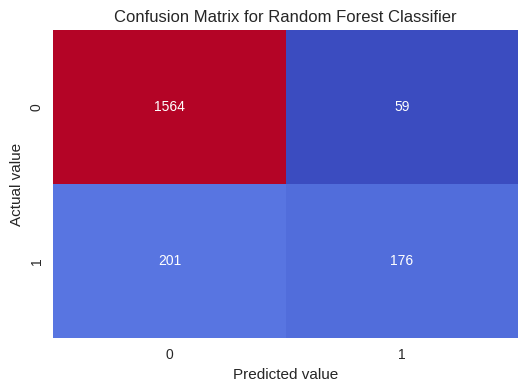

In [24]:
conf_matrix=confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="coolwarm",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

## Accuracy Summary

In [25]:
print("Logistic Regression :- {:.2f}%".format(accuracy_log*100))
print("Random Forest Classifier :- {:.2f}%".format(accuracy_rfc*100))

Logistic Regression :- 81.15%
Random Forest Classifier :- 87.00%
